In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# file_path = "/Users/antonis/Desktop/Artuino/artuino/data/slow_fast.csv"
# df = pd.read_csv(file_path)

In [143]:
df.describe()

,d,y,p,r,a_x,a_y,a_z
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,449.993902,-6.821951,-5.363354,0.789939,42.762195,708.676829,-296.317073
std,45.862625,20.026838,7.551791,6.128533,2972.293981,2894.088012,2744.314727
min,328.000000,-70.820000,-42.860000,-10.140000,-6134.000000,-11618.000000,-13651.000000
25%,413.000000,-23.707500,-11.150000,-3.670000,-603.750000,-416.000000,-679.000000
50%,446.000000,-7.995000,-5.705000,1.010000,-154.000000,95.500000,-86.000000
75%,490.250000,10.210000,0.180000,4.680000,439.000000,959.750000,392.250000
max,580.000000,62.100000,12.690000,39.510000,23653.000000,9857.000000,27798.000000


In [144]:
# removing first 90 observations
df = df[90:].reset_index()
# removing outliers
df_filtered = df
for col in ['a_x', 'a_y', 'a_z']:
    df_filtered = df_filtered[np.abs(stats.zscore(df_filtered[col])) < 3]
df_filtered = df_filtered.reset_index()

In [147]:
stats.zscore(df_filtered[col])

array([ 0.36910086,  0.44478645,  0.63324359,  0.57193826,  0.63929844,
        0.66200412,  0.64308272,  0.64308272,  0.58707538,  0.73996029,
        0.75131313,  0.60145564,  0.22756879, -0.01084085, -0.27801101,
       -0.44527618, -0.40591967,  0.1980514 ,  0.0708996 , -0.03808766,
       -0.10544785, -1.19834789, -1.93476876, -2.4070469 , -2.56371609,
       -2.45397197,  0.59994193,  0.93977027,  1.15471737,  1.1713682 ,
        1.21450899,  0.05576248,  0.06862903,  0.13296179,  0.23135307,
        0.32596006,  0.75131313,  0.7293643 ,  0.57572254,  0.37969684,
        0.23816477, -0.28028158, -0.40591967, -0.56561629, -0.57091428,
       -0.46419758, -2.69995016, -2.58263749, -2.15047272, -1.93098448,
        1.36360962,  1.37344875,  1.22737554,  1.08735719,  1.01924015,
        0.07014274,  0.11782467,  0.21243167,  0.3183915 ,  0.4129985 ,
        0.06635846, -0.10393414, -0.39078255, -0.65719586,  0.25103132,
        0.29190155,  0.25557246,  0.22454136])

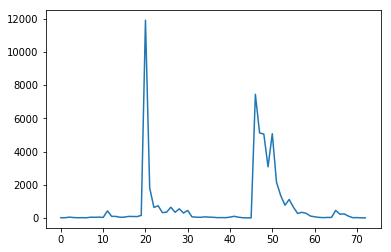

In [145]:
velocity = []
v0 = 0

for i in df.index[1:]:
    event_0 = df.iloc[i - 1]
    event_t = df.iloc[i]
    dt = (pd.to_datetime(event_t['timestamp']) - pd.to_datetime(event_0['timestamp'])).total_seconds()
    at = (event_t['a_x']**2 + event_t['a_y']**2)**1/2
    vt = at*dt*(10**-3)
    velocity.append(vt)
velocity = np.array(velocity)

plt.plot(velocity)
plt.ylim()
plt.show()

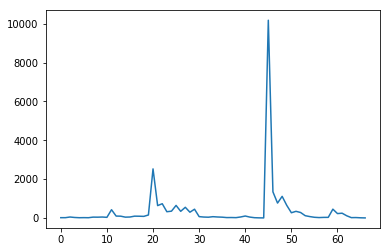

In [146]:
velocity = []
v0 = 0

for i in df_filtered.index[1:]:
    event_0 = df_filtered.iloc[i - 1]
    event_t = df_filtered.iloc[i]
    dt = (pd.to_datetime(event_t['timestamp']) - pd.to_datetime(event_0['timestamp'])).total_seconds()
    at = (event_t['a_x']**2 + event_t['a_y']**2)**1/2
    vt = at*dt
    velocity.append(vt)
velocity = np.array(velocity)

plt.plot(velocity)
plt.ylim()
plt.show()

In [129]:
df_filtered.index[1:]

RangeIndex(start=1, stop=68, step=1)

(100.0, 200.0)

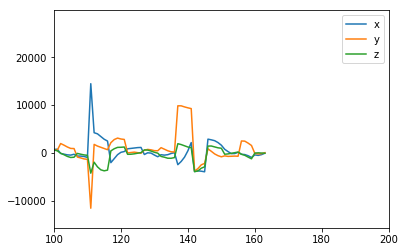

In [130]:
plt.plot(df['a_x'], label = 'x')
plt.plot(df['a_y'], label = 'y')
plt.plot(df['a_z'], label = 'z')
plt.ylim()
plt.xlim(100,200)
plt.legend()
plt.xlim()

In [28]:
from scipy import stats
stats.describe(velocity)

DescribeResult(nobs=225, minmax=(0.19056700000000001, 62598.25539), mean=1185.7020983000002, variance=33984108.81698387, skewness=8.163708790525828, kurtosis=71.62254670946135)

{'whiskers': [<matplotlib.lines.Line2D at 0x109145470>,
 'caps': [<matplotlib.lines.Line2D at 0x109145d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x109145320>],
 'medians': [<matplotlib.lines.Line2D at 0x10914d5c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x10914d9e8>],
 'means': []}

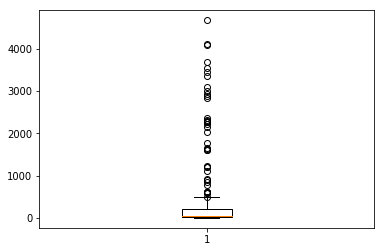

In [32]:
plt.boxplot(velocity[velocity < 5000])

In [32]:
v = [93177.47997798919,
 255546.26845607758,
 6378066.30075953,
 13480344.417615533,
 2219728.1163915396,
 3287260.8016765835,
 3282033.855378008,
 2733572.5806362866,
 1314549.6281205653,
 708772.326640439,
 934259.6306232691,
 909122.7699269771,
 562953.3740788698,
 397208.00060875417,
 637143.8312668323,
 468643.90506141185,
 783693.9162884473,
 947520.9118869782,
 869263.496872735,
 587455.0242110968,
 143551.41025953292,
 1071858.2157317637,
 876887.6271293878,
 891754.4927843809,
 903191.4511723757,
 329789.55102927686,
 766734.7843368768,
 961472.5709849835,
 1018375.0237797976,
 598438.9981363297,
 230572.71024229526,
 1107843.7614973546,
 1232758.871802664]

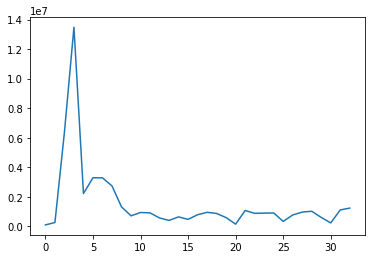

In [35]:
v_arr = np.array(v)
# plt.ylim(0, 5000000)
plt.plot(v_arr)

In [42]:
 13537.0]

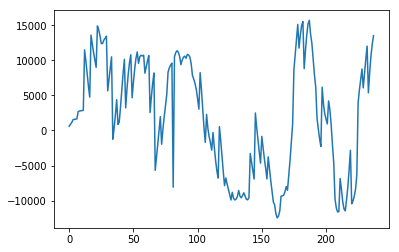

In [43]:
x_arr = np.array(x)
# plt.ylim(0, 2000000)
plt.plot(x_arr)

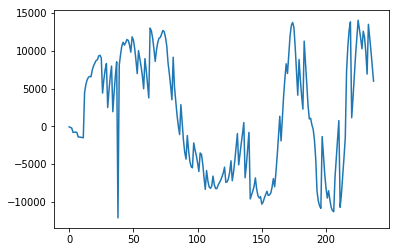

In [45]:
y_arr = np.array(y)
# plt.ylim(0, 2000000)
plt.plot(y_arr)

In [46]:
x2 = [6207.0,
 8625.0,
 9984.0,
 3683.0,
 3173.0,
 2313.0,
 1694.0,
 -3330.0,
 -3598.0,
 -3888.0,
 -4389.0,
 -4849.0,
 -3577.0,
 -3181.0,
 -2727.0,
 -2440.0,
 -2722.0,
 -2373.0,
 -2140.0,
 -2118.0,
 -2206.0,
 9524.0,
 10803.0,
 11664.0,
 12155.0,
 9524.0,
 9856.0,
 9292.0,
 8800.0,
 8561.0,
 8490.0,
 8830.0,
 9121.0,
 9155.0,
 9032.0,
 5132.0,
 5257.0,
 5132.0,
 4957.0,
 4834.0,
 5210.0,
 5167.0,
 5245.0,
 5436.0,
 5470.0,
 5397.0,
 5482.0,
 5474.0,
 5222.0,
 4978.0,
 4200.0,
 4278.0,
 4395.0,
 4397.0,
 4356.0,
 2689.0,
 2632.0,
 2733.0,
 2692.0,
 2513.0,
 971.0,
 902.0,
 791.0,
 720.0,
 736.0,
 -69.0,
 -73.0,
 -47.0,
 -15.0,
 -33.0,
 60.0,
 19.0,
 -43.0,
 -72.0,
 -29.0,
 68.0,
 90.0,
 65.0,
 2433.0,
 349.0,
 394.0,
 410.0,
 372.0,
 376.0,
 752.0,
 751.0,
 772.0,
 850.0,
 905.0,
 1350.0,
 1344.0,
 1317.0,
 1277.0,
 -13000,
 1117.0,
 1046.0,
 1008.0,
 1021.0,
 1037.0,
 1065.0,
 1060.0,
 1102.0,
 1117.0,
 1116.0,
 862.0,
 778.0,
 786.0,
 827.0,
 714.0,
 748.0,
 710.0,
 676.0,
 664.0,
 141.0,
 139.0,
 128.0,
 97.0,
 110.0,
 -575.0,
 -693.0,
 -742.0,
 -733.0,
 -946.0,
 -980.0,
 -978.0,
 -936.0,
 -1550.0,
 -897.0,
 -904.0,
 -894.0,
 -955.0,
 -967.0,
 -645.0,
 -674.0,
 -668.0,
 -675.0,
 -696.0,
 -407.0,
 -386.0,
 -328.0,
 -341.0,
 97.0,
 107.0,
 183.0,
 236.0,
 13000,
 740.0,
 686.0,
 714.0,
 699.0,
 662.0,
 911.0,
 898.0,
 892.0,
 892.0,
 871.0,
 1050.0,
 1038.0,
 1019.0,
 1029.0,
 -13000,
 1402.0,
 1381.0,
 1359.0,
 1337.0,
 1297.0,
 501.0,
 497.0,
 476.0,
 453.0,
 460.0,
 121.0,
 163.0,
 158.0,
 85.0,
 59.0,
 -236.0,
 -292.0,
 -336.0,
 -370.0,
 -718.0,
 -731.0,
 -751.0,
 -772.0,
 13000,
 -1072.0,
 -1087.0,
 -1044.0,
 -1006.0,
 -1020.0,
 -848.0,
 -839.0,
 -832.0,
 -841.0,
 -877.0,
 -583.0,
 -533.0,
 -494.0,
 -450.0,
 -533.0,
 -579.0,
 -585.0,
 -578.0,
 6622.0,
 245.0,
 255.0,
 245.0,
 235.0,
 236.0,
 880.0,
 915.0,
 969.0,
 996.0,
 1014.0,
 1242.0]

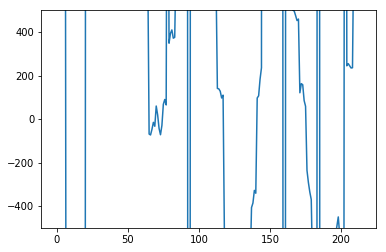

In [52]:
x2_arr = np.array(x2)
plt.ylim(-70, 500)
plt.plot(x2_arr)